In [115]:
df = pd.read_csv('/kaggle/input/international-iq-by-countries/International_IQ.csv')

In [116]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

## 1. Understand the data

In [117]:
df.head(5)

,Ranking,Country,Average IQ,Participants
0,1,Japan,108.14,155534
1,2,South Korea,107.00,104316
2,3,China,106.59,190255
3,4,Iran (Islamic Republic of),106.52,1657
4,5,Singapore,104.75,5975


In [118]:
df.dtypes

Ranking           int64
Country          object
Average IQ      float64
Participants      int64
dtype: object

In [119]:
df.describe()

,Ranking,Average IQ,Participants
count,125.000000,125.000000,125.000000
mean,63.000000,95.839920,12527.864000
std,36.228442,4.670021,29347.233519
min,1.000000,86.050000,209.000000
25%,32.000000,92.980000,960.000000
50%,63.000000,96.830000,2430.000000
75%,94.000000,99.050000,10830.000000
max,125.000000,108.140000,190255.000000


In [120]:
df.shape

(125, 4)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       125 non-null    int64  
 1   Country       124 non-null    object 
 2   Average IQ    125 non-null    float64
 3   Participants  125 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ KB


## 2. Data preprocessing

In [122]:
df.loc[df['Country'].isnull()]

#Since I have no other information about this NULL value, I will delete it from the dataset 

,Ranking,Country,Average IQ,Participants
52,53,NaN,97.37,3816


In [123]:
df.dropna(inplace=True)

In [124]:
df.iloc[50:55]

,Ranking,Country,Average IQ,Participants
50,51,Norway,97.41,13591
51,52,Tunisia,97.38,4686
53,54,Bangladesh,97.18,1519
54,55,Turkey,97.13,42801
55,56,Latvia,97.07,2900


In [125]:
df.reset_index(drop=True, inplace=True)
df

,Ranking,Country,Average IQ,Participants
0,1,Japan,108.14,155534
1,2,South Korea,107.00,104316
2,3,China,106.59,190255
3,4,Iran (Islamic Republic of),106.52,1657
4,5,Singapore,104.75,5975
...,...,...,...,...
119,121,El Salvador,86.96,1415
120,122,Congo,86.91,356
121,123,Honduras,86.87,2010
122,124,Nicaragua,86.30,1585


In [126]:
df.duplicated().sum()

0

In [127]:
df['Country'].nunique()

124

## 3. Data visualization

In [128]:
df_top10 = df.sort_values(by='Average IQ', ascending=False)
df_top = df_top10.head(10)

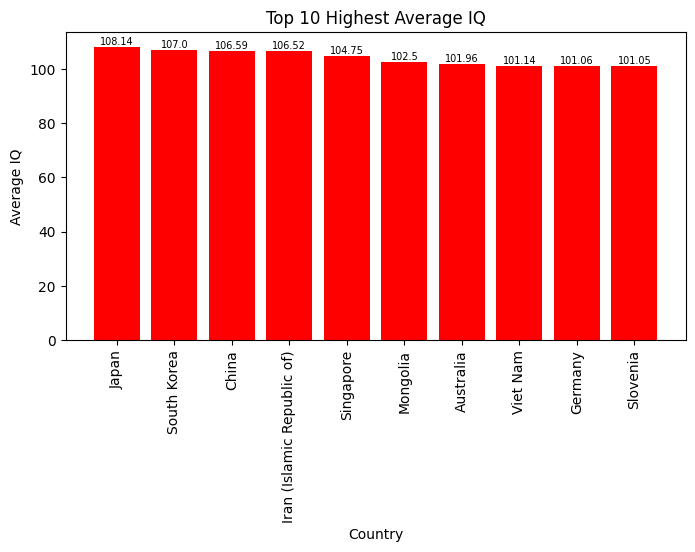

In [129]:
plt.figure(figsize=(8,4))

def addlabel(x, y, labels):
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha='center', va='bottom', size=7)

plt.bar(data=df_top, x='Country', height='Average IQ', color='r')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average IQ')
plt.title('Top 10 Highest Average IQ')

addlabel(df_top['Country'], df_top['Average IQ'], df_top['Average IQ'])
plt.show()

I'm a Vietnamese. Kinda proud to see my country in the top 10 even though myself is really not that smart lol 

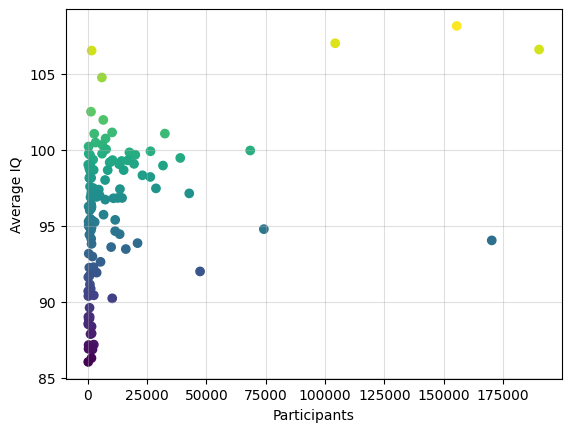

In [130]:
plt.scatter(data=df, x='Participants', y='Average IQ', marker='o', c='Average IQ', cmap='viridis')

plt.xlabel('Participants')
plt.ylabel('Average IQ')
plt.grid(alpha=0.4)

plt.show()

It seems that for some countries that had a huge number of participants had a higher Average IQ than the rest. However, that wasn't always the case. Some countries that had the number of participants as low as only a few thousands turnt out to possess really high ranking

If only the dataset had information on individual IQ would be a bonus so we could disect the outliers and each country distribution to reflect accurately the Average IQ of each country, since the top 3 had an extremely large number of participants. 

In conclusion, the majority of those in the top 10 are mostly Asian. Another reinforcing statement showing how smart Asian really are (Which I'm really not lol) 

# Hope you enjoy this short EDA! 